# Part I - (E-Commerce Super Store Dataset Exploration)
## by (Mahdi Ben Fekih)

## Introduction
> The dataset selected for this project is a sample from an E-commerce super store sales that operates on a global scale. The dataset is added to the submission folder. Through a detailed, meticulous exploratory analysis and with the help of data visualization, a variety of data trends were uncovered. This jupyter notebook contains different parts, ranging from data wrangling to univariate, bivariate and multivariate data visualization.
## Table of Contents
<ul>
<li><a href="#prem">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate</a></li>
<li><a href="#bi">Bivariate</a></li>
<li><a href="#multi">Multivariate</a></li>
<li><a href="#ccl">Conclusions</a></li>
</ul>

<a id='prem'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline

#import libraries
import numpy as np             
import pandas as pd                                                     
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sb                                                   
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#Setting font
sb.set(font_scale=1.3)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df.shape

(51290, 21)

In [4]:
for columns in df.columns:
        print(columns)

order_id
order_date
ship_date
ship_mode
customer_name
segment
state
country
market
region
product_id
category
sub_category
product_name
sales
quantity
discount
profit
shipping_cost
order_priority
year


In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia', 'Madagascar',
       'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin', 'Bangladesh',
       'Panama', 'Chile', 'South Korea', 'Switzerland', 'Moldova',
       'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

> #### For convenience reasons, and to ease data visualization, only the top 20 countries profit wise are going to be selected to undergo the analysis.  

In [7]:
df.groupby('country').profit.sum().nlargest(20)

country
United States     286397.02170
China             150683.08500
India             129071.83500
United Kingdom    111900.15000
France            109029.00300
Germany           107322.82050
Australia         105484.96300
Mexico            102818.09752
Spain              54390.12000
El Salvador        42023.24320
Cuba               38889.21548
Nicaragua          33401.44456
Brazil             30090.49896
Guatemala          27944.68676
Iran               26856.24000
Austria            24341.70000
Japan              24328.46700
Morocco            22761.42000
Russia             22536.45000
South Africa       21936.63000
Name: profit, dtype: float64

In [4]:
df1 = df.loc[df['country'].isin(['United States','China','India','United Kingdom', 'France', 'Germany', 'Australia',
                                 'Mexico', 'Spain', 'El Salvador', 'Cuba', 'Nicaragua', 'Brazil', 'Guatemala', 'Iran', 'Austria',
                                'Japan', 'Morocco' , 'Russia', 'South Africa'])]

In [9]:
df1.shape

(32972, 21)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32972 entries, 1 to 51289
Data columns (total 21 columns):
order_id          32972 non-null object
order_date        32972 non-null datetime64[ns]
ship_date         32972 non-null datetime64[ns]
ship_mode         32972 non-null object
customer_name     32972 non-null object
segment           32972 non-null object
state             32972 non-null object
country           32972 non-null object
market            32972 non-null object
region            32972 non-null object
product_id        32972 non-null object
category          32972 non-null object
sub_category      32972 non-null object
product_name      32972 non-null object
sales             32972 non-null float64
quantity          32972 non-null int64
discount          32972 non-null float64
profit            32972 non-null float64
shipping_cost     32972 non-null float64
order_priority    32972 non-null object
year              32972 non-null int64
dtypes: datetime64[ns](2), float6

In [11]:
#Checking for missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [12]:
#Checking for duplicates
sum(df1.duplicated())

0

In [5]:
# convert ship_mode and order_priority into ordered categorical types
ordinal_var_dict = {'ship_mode': ['Standard Class','Second Class','First Class','Same Day'],
                    'order_priority': ['Low', 'Medium', 'High', 'Critical'] }
                    

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): 
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df1[var] = df1[var].astype(ordered_var)
    else: # pre-v0.21
        df1[var] = df1[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [6]:
# Dropping unecessary columns : Region was dropped because it was summarized by another column (market)
df1.drop(['customer_name', 'region', 'state'], axis=1, inplace=True) 

In [15]:
df1.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode               category
segment                   object
country                   object
market                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority          category
year                       int64
dtype: object

In [16]:
df1.shape

(32972, 18)

### What is the structure of your dataset?

> This dataset contains 32972 rows and 18 columns, the features describing this dataset are:
- Order ID: contains the Unique Order ID for each Customer
- Order Date: contains the Order Date of the product
- Ship Date: contains the Shipping Date of the Product
- Ship Mode: contains the Shipping Mode specified by the Customer
- Customer ID: contains the Unique ID to identify each Customer
- Segment: contains the segment where the Customer belongs
- Country: contains the Country of residence of the Customer
- City: contains the City of residence of of the Customer
- Market: contains the name of the market related to the country.
- State: contains the State of residence of the Customer
- Postal Code: contains the Postal Code of every Customer
- Product ID: contains the Unique ID of the Product
- Category: contains the Category of the product ordered
- Sub-Category: contains the Sub-Category of the product ordered
- Product Name: contains the Name of the Product
- Sales: contains the Sales of the Product
- Quantity: contains the Quantity of the Product
- Discount: contains the Discount providedv
- Profit: Profit/Loss incurred

### What is/are the main feature(s) of interest in your dataset?

> The feature this report focuses on is mainly profit. The aim of this exploration is to unveil the lid off the variables that enhance or decrease the profit.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will supprt this analysis are the country that made most orders, sales, segment, most profitable markets, and the highest moneymaking categories and sub_categories.

<a id='uni'></a>
## Univariate Exploration

> #### We will start this section by a univariate plot depicting the countries with most orders. We will then inspect the market share as well as the shipping methods occurences, this to get a general overview of the data.

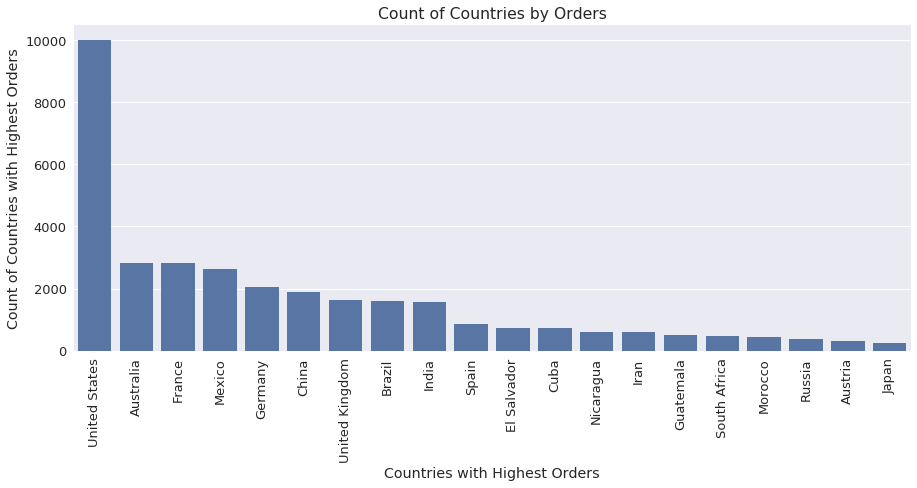

In [17]:
plt.figure(figsize=(15,6))
base_color = sb.color_palette()[0]
c_order  = df1.country.value_counts().index
plt.xticks(rotation = 90)
sb.countplot(data=df1, x='country', color=base_color, order = c_order); 
plt.ylabel('Count of Countries with Highest Orders')
plt.xlabel('Countries with Highest Orders')
plt.title('Count of Countries by Orders');

> #### United States if the highest ordering country with a count of orders that slightly exceeds 10 000 order. What about the market share? In order to correctly visualize the market share in percentage, prelimenary coding is mandatory.

In [9]:
mysum = df1['market'].value_counts().values.sum()

In [10]:
#This function is used twice, in Pie Chart of Different Regions Market share and in Pie Chart of Employed Shipping Methods.
def label_pie(percent):
    x = np.round(percent/100 * mysum)
    return "{0}({1}%)".format(x, np.round(percent))

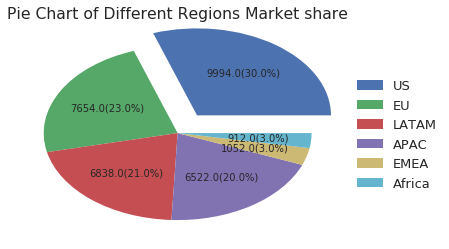

In [20]:
plt.pie(df1['market'].value_counts(), explode=[0.25,0,0,0,0,0], autopct = label_pie)
plt.legend(df1['market'].value_counts().index, bbox_to_anchor=(1,.8));
plt.title('Pie Chart of Different Regions Market share')
rcParams['figure.figsize'] = 12,6;

> #### This pie plot confirms that the United States holds the biggest part of the market share. Now let's investigate to which category belong the products that are being sold.

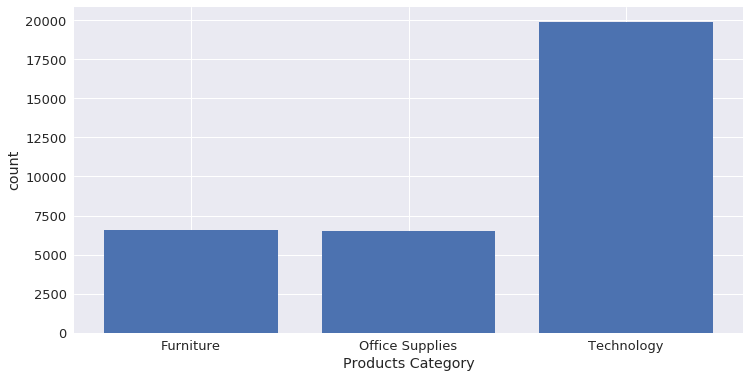

In [21]:
x = df1['category'].unique()
# Return the Series having frequency count of each unique value
y = df1['category'].value_counts(ascending=True)
plt.bar(x, y)
# Labeling the axes
plt.xlabel('Products Category')
plt.ylabel('count')
# Dsiplay the plot
plt.show()

> #### Office Supplies rank first in the volume of items sold, let's get a deeper look and investigate the sub-categories. A categorical bar chart will best serve this purpose. Before that, preliminary coding must be included.

In [22]:
#returns the decreasing order of the frequency
sub_counts = df1['sub_category'].value_counts()
# Get the unique values of the `sub_category` column, in the decreasing order of the frequency.
sub_order = sub_counts.index
# Returns the sum of all not-null values in `sub_category` column
n_subcat = df1['sub_category'].value_counts().sum()


The frequency of each sub category is:
 Binders        4052
Storage        3062
Art            2960
Paper          2612
Phones         2272
Chairs         2257
Furnishings    2208
Accessories    2067
Labels         1657
Envelopes      1493
Bookcases      1487
Supplies       1430
Fasteners      1427
Copiers        1339
Appliances     1171
Machines        849
Tables          629
Name: sub_category, dtype: int64


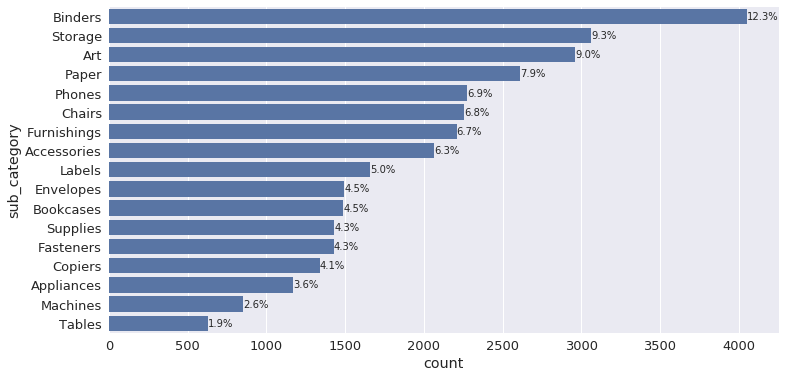

In [23]:
print('The frequency of each sub category is:\n', df1['sub_category'].value_counts())
base_color = sb.color_palette()[0]
sb.countplot(data=df1, y='sub_category', color=base_color, order=sub_order);

# Logic to print the proportion text on the bars
for i in range (sub_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = sub_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_subcat) + '%'
    # Print the string value on the bar.
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

> #### Binders, storage, art are the most ordered sub-categories. Those products have certainly been shipped, let's see the most operating shipping method.

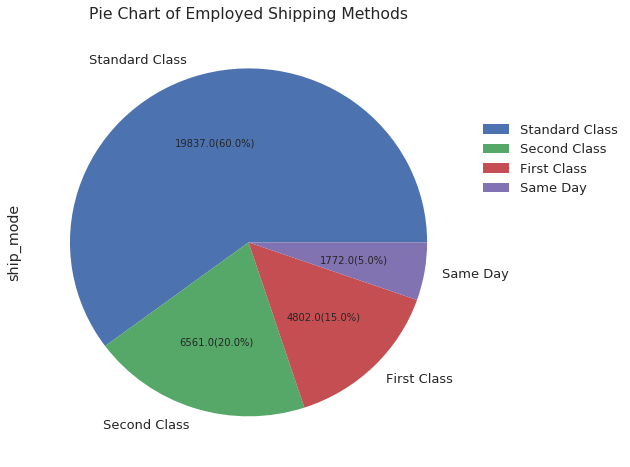

In [11]:
df1['ship_mode'].value_counts().plot(kind='pie',figsize=[8,8],autopct=label_pie);
plt.legend(df1['ship_mode'].value_counts().index, bbox_to_anchor=(1,.8));
plt.title('Pie Chart of Employed Shipping Methods');

> #### It is clear that most orders employed the standard class. Let's see the shipping priority distribution within those classes.

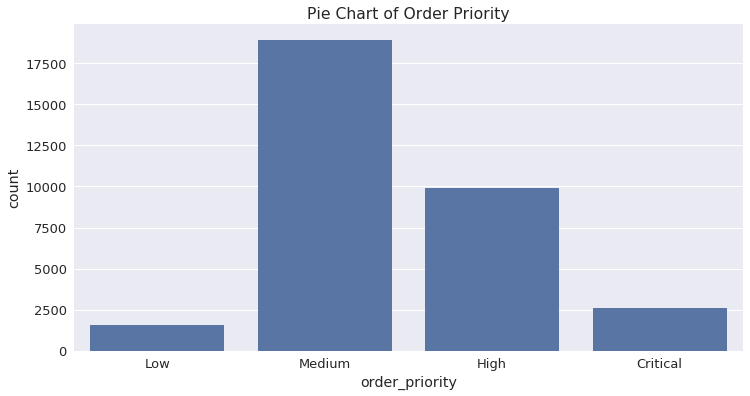

In [25]:
base_color = sb.color_palette()[0]
sb.countplot(data=df1, x='order_priority', color=base_color)
plt.title('Pie Chart of Order Priority'); #Ordinal

> #### Now that it is clear that most orders were placed under the Medium order priority, let's discover which year witnessed the highest number of orders.

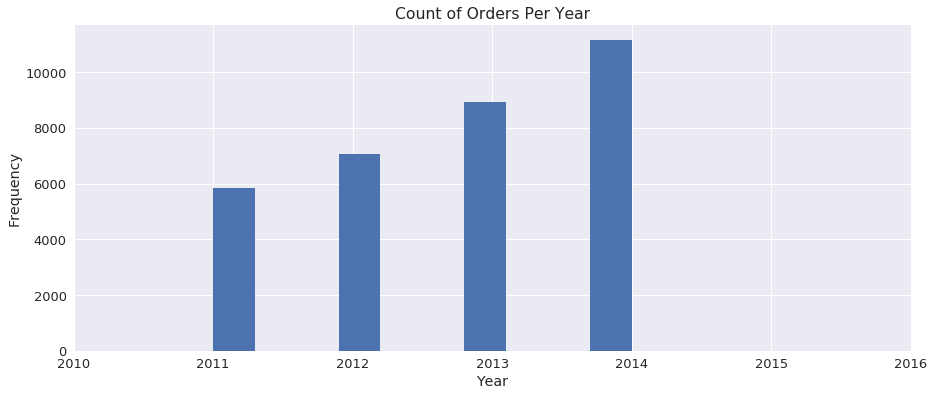

In [26]:
# plot distribution of year per orders
# Generate the x-ticks to apply
ticks = [2010, 2011, 2012 , 2013, 2014, 2015, 2016]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
df1['year'].plot(kind='hist', figsize= (15,6));
plt.title('Count of Orders Per Year')
plt.xlabel('Year');
plt.xticks(ticks, labels);

> #### 2014 is the year where most orders were placed. Now how about we see the quantity of items placed per order?

In [27]:
df1.quantity.describe()

count    32972.000000
mean         3.688463
std          2.250567
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: quantity, dtype: float64

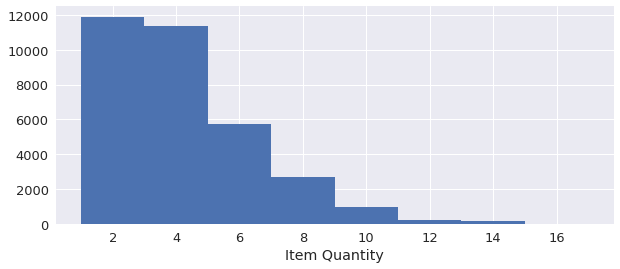

In [28]:
##standard-scaled plot
binsize = 2
bins = np.arange(1, df1['quantity'].max()+5, binsize)
plt.figure(figsize=(10,4))
plt.hist(data = df1, x = 'quantity', bins = bins)
plt.xlabel('Item Quantity')
plt.show()

> #### The quantity of items ranges between 1 and 15 items. This said, let's finish up this section by taking a peek into the profit's distribution.

In [31]:
df1.profit.describe()

count    32972.000000
mean        44.650221
std        180.407127
min      -6599.978000
25%          3.261600
50%         13.618500
75%         46.325000
max       8399.976000
Name: profit, dtype: float64

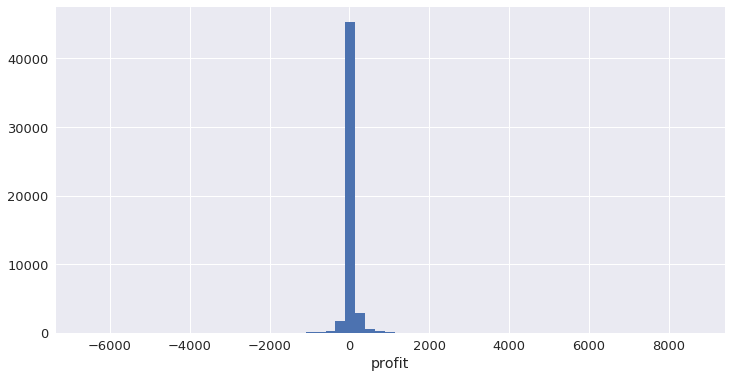

In [40]:
bin_edges = np.arange(-6600, df['profit'].max()+500, 250) #arg(lower bound, upper bound , bin size)
sb.distplot(df['profit'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1});

> #### The distribution of the profit appears to be symmetrical with both negative and positive values.

> #### Profit takes integer values, meaning that besides the countries that make positive profit, some countries are incuring huge loses.

> #### Only the 20 first countries profit wise were included, order priority and shipping method were transformed into ordinal categorcial data to accuratly depict its visualization, and a function that computes percentages was added.

<a id='uni'></a>
## Bivariate Exploration

> #### We will start this section by looking into the most profitable countries profit wise.

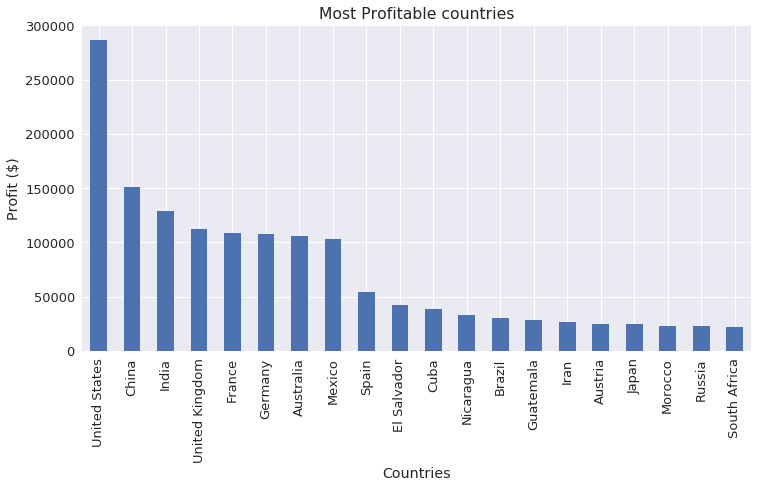

In [41]:
df1.groupby('country').profit.sum().nlargest(20).plot(kind='bar', color=sb.color_palette()[0]);
rcParams['figure.figsize'] = 10,10;
plt.title('Most Profitable countries')
plt.xlabel('Countries')
plt.ylabel('Profit ($)');

> #### United states is the most profitable country, followed by China and India. A reminder that United states ranks first in the number of orders (previous section). Let's visualize from a bigger scope, on a market level, will the US still rank first as the most profitable market?

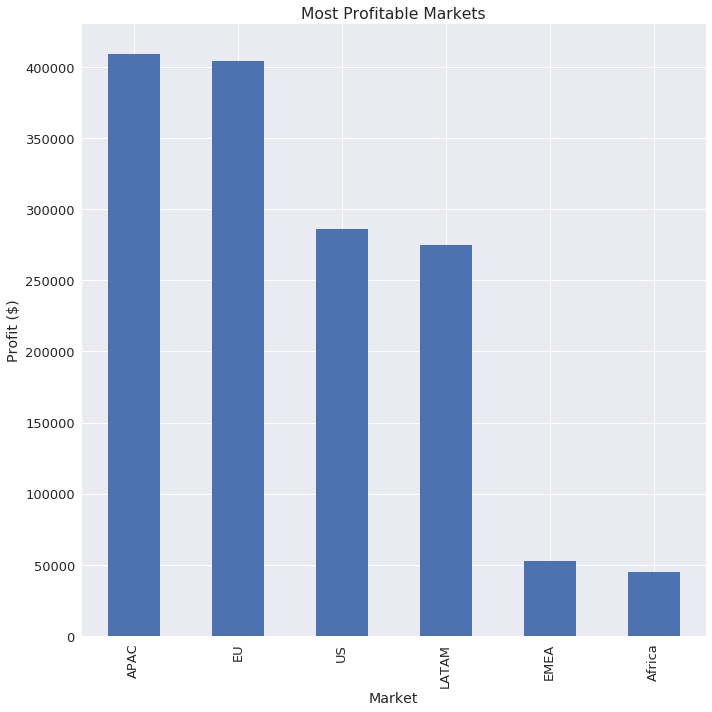

In [44]:
df1.groupby('market').profit.sum().nlargest(6).plot(kind='bar', color=sb.color_palette()[0]);
rcParams['figure.figsize'] = 10,10;
plt.title('Most Profitable Markets')
plt.xlabel('Market')
plt.ylabel('Profit ($)')
plt.tight_layout();

> #### Now this is starting to get interesting! The US alone cannot stand alone in the market, it is now confirmed that APAC and EU generate more profit than US alone! Now what about the segments targeted on the market, which segment creates more profit?

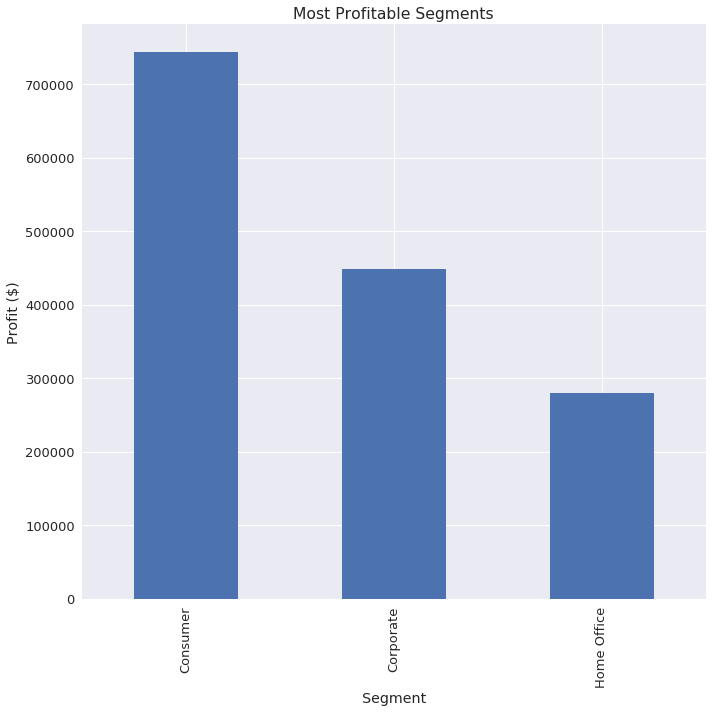

In [43]:
df1.groupby('segment').profit.sum().nlargest(6).plot(kind='bar', color=sb.color_palette()[0]);
rcParams['figure.figsize'] = 10,10;
plt.title('Most Profitable Segments')
plt.xlabel('Segment')
plt.ylabel('Profit ($)')
plt.tight_layout();

> #### The individual consumer is the one who generates most of the profit followed by corporate then home office! What category of products are they purchasing?

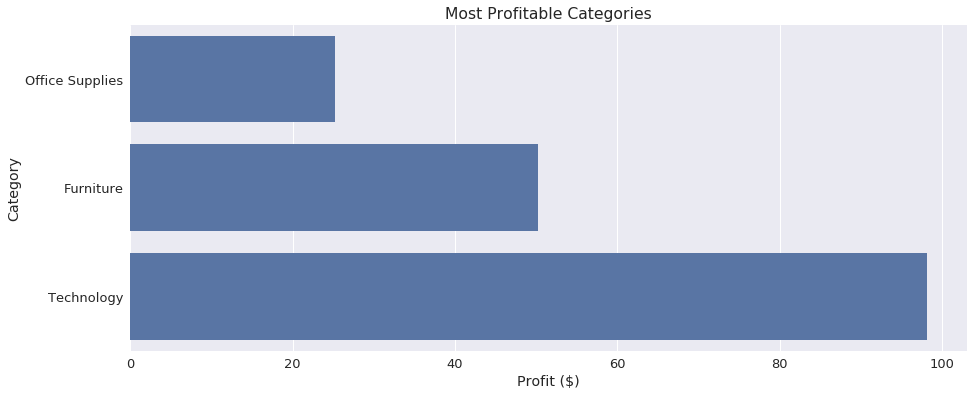

In [46]:
plt.figure(figsize=(15,6))
sb.barplot(data=df1, x = 'profit', y='category', ci=None, color=sb.color_palette()[0]);
plt.title('Most Profitable Categories')
plt.xlabel('Profit ($)')
plt.ylabel('Category');

> #### On average, technology is the most profitable category, furniture and office supplies come after respectively. Let's see how those categories are distibuted throughout the market.

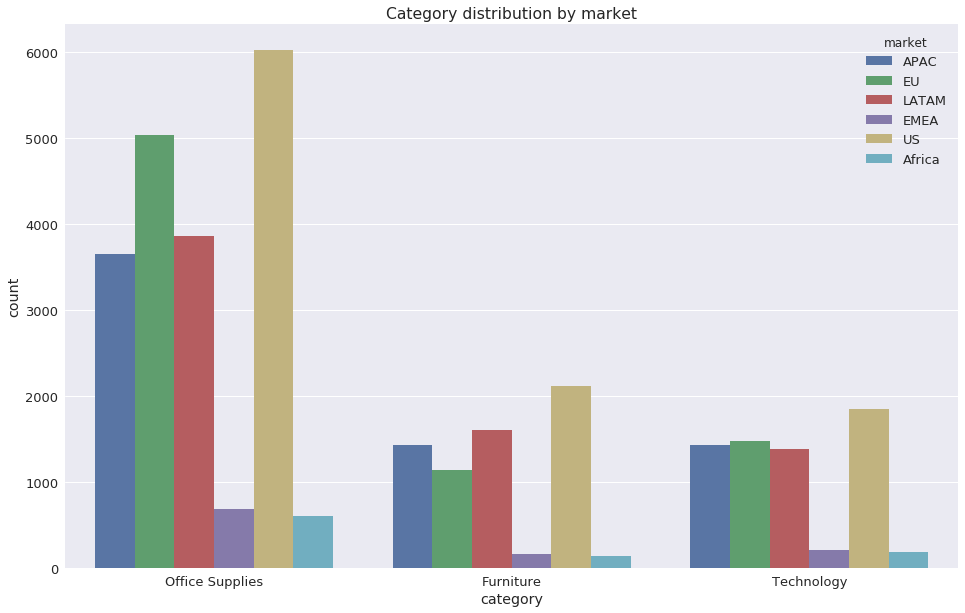

In [141]:
sb.countplot(data = df1, x = 'category', hue = 'market')
plt.title('Category distribution by market');

> #### The US is again the first ranking in the 3 categories order wise followed by the EU, a question that will follow us through this analysis, does the count of order really reflect the profit? But first let's see how those products are being carried out.

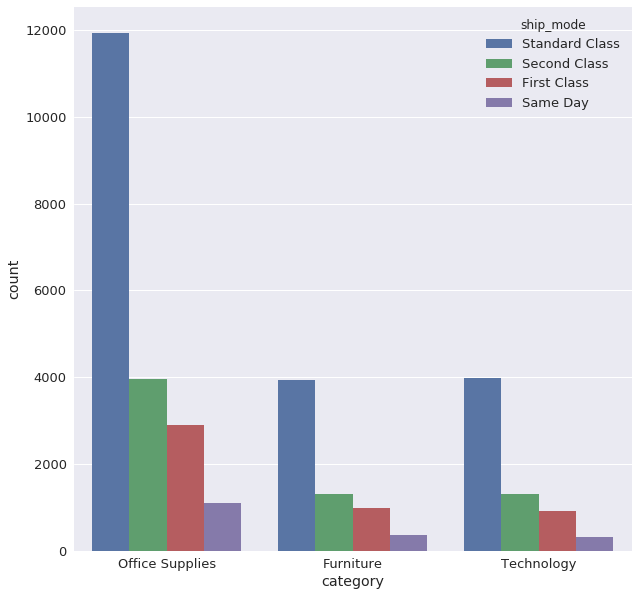

In [48]:
sb.countplot(data = df1, x = 'category', hue = 'ship_mode');

> #### Standard class carried the majority of orders! The shipping cost of the products surely contributes a lot to the profit! Let's investigate this matter, how? We will to need a special tool, a heatmap, let's instantly get to. 

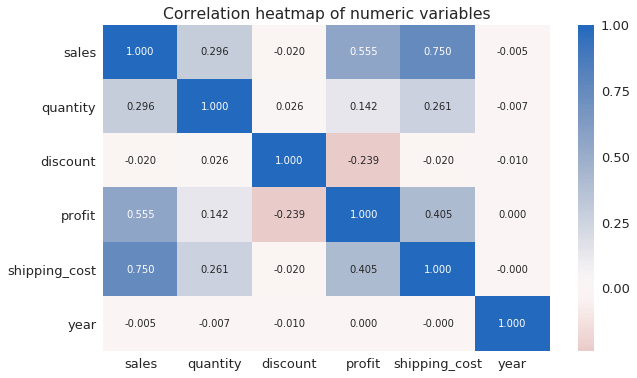

In [51]:
numeric_vars = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'year']
# correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(df1[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation heatmap of numeric variables');
plt.show()

> #### Now that's a catch! Profit is highly and extremely correlated to the shipping cost, and on a lesser level to sales. This intrinsically means that an increase in shipping cost, sales affects positively the profit. Here it is important to mention that you  can also grant shipping cost and sales a closer look and then presume the effet on profit, but first, let's visualize our precious finding.

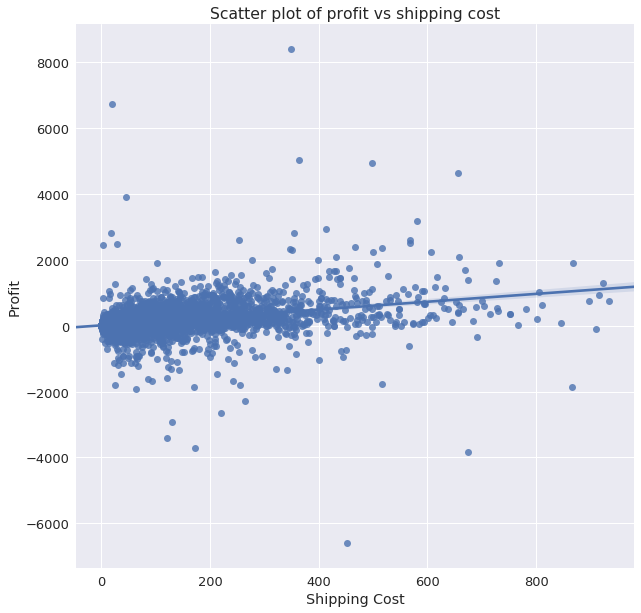

In [52]:
sb.regplot(data = df1, x = 'shipping_cost', y = 'profit');
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.title('Scatter plot of profit vs shipping cost');


> #### Some outliers, but generally the shipping cost and profit are strongly correlated. On the other hand the shipping cost depends on the shipping class and priority of the order! how to prove that? let's get to work.

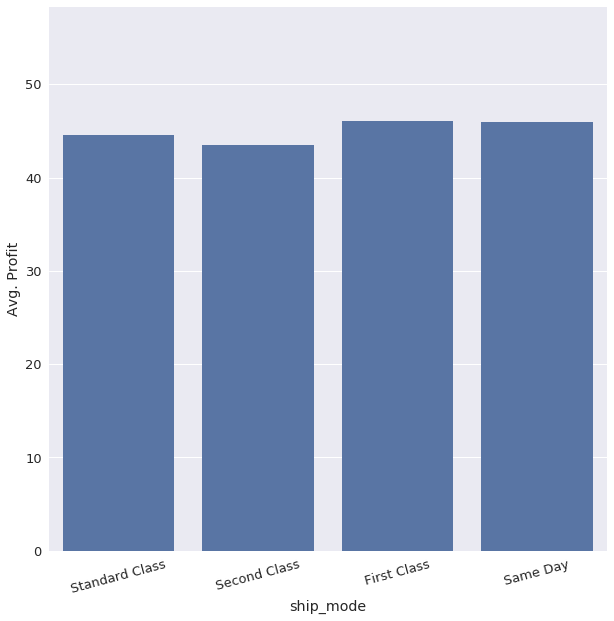

In [58]:
#Adaptation of univariate barplot by the average of a numerical variable
base_color = sb.color_palette()[0]
plt.xticks(rotation=15)
sb.barplot(data=df1, x='ship_mode', y='profit', color=base_color, errwidth=0) #error
plt.ylabel('Avg. Profit')
plt.title('Scatter plot of profit vs shipping cost');

> #### On average, first class and same day shipping methods, which by the way have a higher cost, incur the most profit, what about the shipping priority, does it affect the shipping cost?

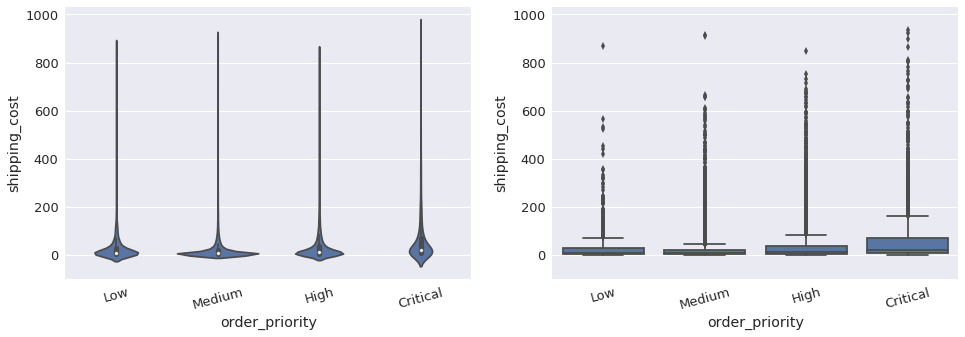

In [59]:
##Violon Plots
# bivariate plots of shipping_cost vs. cut, color, clarity
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df1, x='order_priority', y='shipping_cost', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df1, x='order_priority', y='shipping_cost', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

> #### As depicted by the violon plots, although most orders are carried out under the medium order priority, it is the critical order priority that generates more profit as told by the boxplot.

> #### Profit is directly related to shipping cost and sales. Shipping cost varies depending on the class and priority wheras sales will be further investigated in the next section.

> #### Office supplies relies essentially on standard class shipping which explains why it generates the least profit.

<a id='multi'></a>
## Multivariate Exploration

> #### let's dive deeper into the relationship between shipping cost, profit, sales, and the other variables. 

> #### Knowing that Furniture and Technology are the most contributing to the profit, can we visualize the relationship between sales, profit and the lattermost category types?

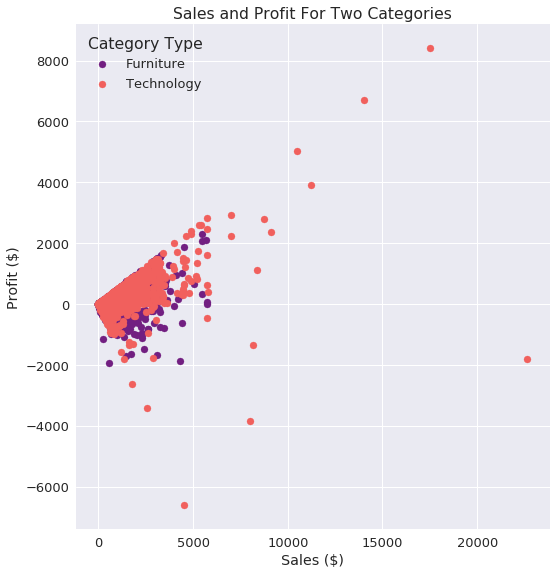

In [133]:
df1_sub = df1.loc[df1['category'].isin(['Technology','Furniture'])]
g = sb.FacetGrid(data = df1_sub, hue = 'category', size = 8, palette = 'magma')
g.map(plt.scatter, 'sales','profit')
# add labels and titles
g.set_xlabels('Sales ($)')
g.set_ylabels('Profit ($)')
plt.title('Sales and Profit For Two Categories')
plt.legend(['Furniture', 'Technology'], title = 'Category Type');

> #### A visual that endorses our previous findings, profit and sales appear to be positively correlated and the density of Technology products highly dominates the furniture category, which again confirms that the sales and profit of technology products is the most contributing to the overall profit. How about we take a deeper look into the sub-categories?

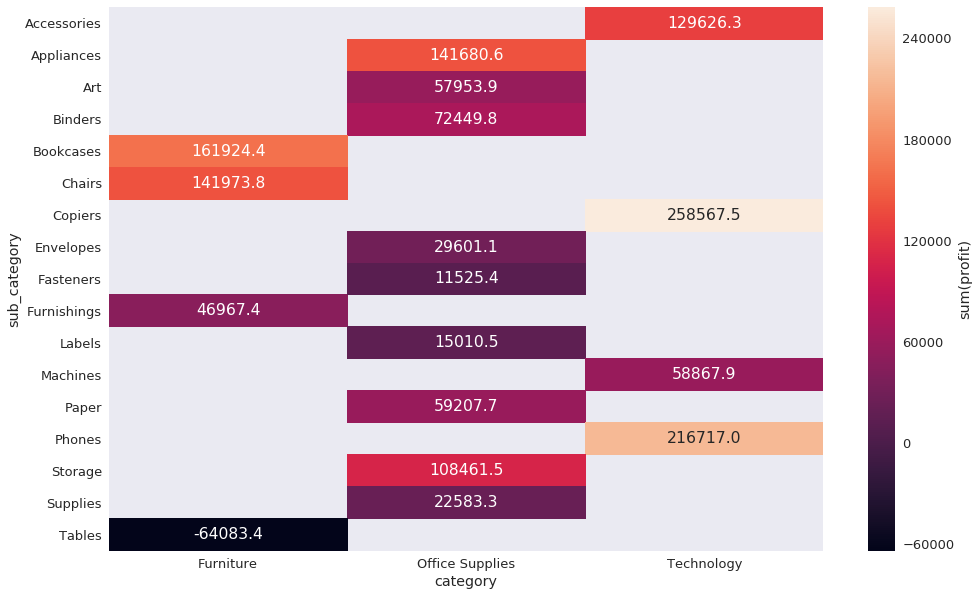

In [138]:
cat_means = df.groupby(['category', 'sub_category']).sum()['profit']
cat_means = cat_means.reset_index(name = 'profit_avg')
cat_means = cat_means.pivot(index = 'sub_category', columns = 'category',
                            values = 'profit_avg')
sb.heatmap(cat_means, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'sum(profit)'});
rcParams['figure.figsize'] = 16,10;

> #### A sum of the profit within each sub-category, again confirms that Technology is the highest profit generating category with Phones as the most moneymaking item. Although Furniture comes second, the fact that Tables incurs huge loses to this category raises our concerns that Tables must be given up on and exploit their funds for another profitable item such as bookcases.



> #### Phones, a sub-category of Technology category are real moneymaking items. Wheras Tables are to be discarded in the next Sales Department meeting.


<a id='ccl'></a>
## Conclusions
> #### The most profitable country is the United States of America Wheras the most profitable markets are APAC, EU then comes the united states, this is mainly because the US orders mainly Furniture and office supplies. Thus we can answer to our previous question that the count of orders doesn't strictly reflect a greater profit.

> #### The most profitable market segment is the individual consumer, which explains why Phones from the Technology category are the most beneficial items, In fact people have a propensity to buy mobile phones from internet for various reasons such as: good deals, unavailability of those products in their home countries etc.. 

> #### The high correlation between the shipping cost and profit alongside the information of consumers having a penchant for mobile phones is a key insight to the store owner. to generate more profit, shipping cost of mobile phones ought to have a slight raise or restricted to the critical of first class shipping category. A slight raise in the price wouldn't bother consumers as much as it would engender millions of additional profit. 
